In [1]:
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/authority_dataset.csv')
df

,ad,auth
0,north korea officially has no corona cases how...,1
1,it seems difficult to stand for something one ...,0
2,senator bernie sanders held a rally with randy...,1
3,life gets busy—don’t wait to send back your ba...,0
4,some issues feel impossible to compromise on b...,1
...,...,...
49661,a recent poll shows sherrod with just a one po...,0
49662,today’s donor goal ⃣ ⃣ ⃣ our endofquarter dead...,0
49663,you’ve been selected after a year of chaos hat...,1
49664,after receiving the corona vaccine a video tha...,0


In [3]:
X_train, X_test, y_train, y_test  = train_test_split(df['ad'], df['auth'], test_size = 0.33, random_state=42)


**Count vectorizer**
---



In [16]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_tf,y_train)

RandomForestClassifier()

accuracy:   0.913
                  precision    recall  f1-score   support

non_social_norms       0.91      0.91      0.91      8190
    social_norms       0.91      0.91      0.91      8200

        accuracy                           0.91     16390
       macro avg       0.91      0.91      0.91     16390
    weighted avg       0.91      0.91      0.91     16390

confusion matrix:
[[7482  708]
 [ 726 7474]]



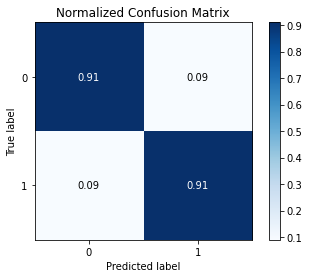

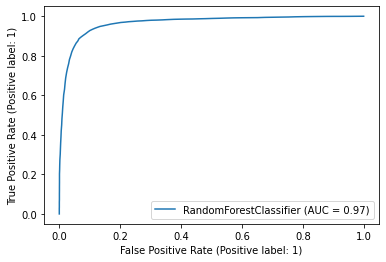

In [18]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['non_social_norms', 'social_norms']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [13]:
df_val = pd.read_csv('./data/sample_auth.csv')
df_val

,ad,authority
0,the european youth event is back in strasbourg...,1
1,learn the greatest tips tricks from the world...,1
2,live women leaders discuss how to accelerateeq...,1
3,if you love motorsport but work in another ind...,0
4,together we can turn the tide to protect our p...,0
...,...,...
103,it takes courage to take control of our life a...,0
104,experts from waseda university are advising ja...,1
105,a team of investigators from the rush universi...,1
106,you should recycle your jeansin the 4th episod...,1


accuracy:   0.694
              precision    recall  f1-score   support

no authority       0.66      0.81      0.73        54
   authority       0.76      0.57      0.65        54

    accuracy                           0.69       108
   macro avg       0.71      0.69      0.69       108
weighted avg       0.71      0.69      0.69       108

confusion matrix:
[[44 10]
 [23 31]]



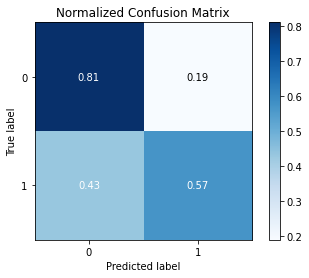

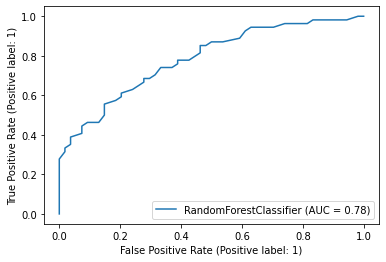

In [19]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['authority']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)